ELEVEN - ELEctronic inVoicEs in the portuguese laNguage

Preparação do ambiente (instalação do Java e H2O)

5. Import Dataframe

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/vinidiol/descmerc/main/AmostraDescMerc_onehot.csv'
df = pd.read_csv(url, delimiter = '\t', encoding = 'utf-8')

> 5.1 Check the imported Dataframe




In [3]:
df.head(6)

,text,cosmetics,cleaning,food
0,- REEF.: (140330) - SPRAY CAPILAR 270ML - TIGI...,1,0,0
1,BOZZANO ESPUMA BARBA CERRADA 6X190G,1,0,0
2,NINA ELIXIR BC100 GENERIC GWP 2012,1,0,0
3,"CHA DE CAMOMILA 12X10X1,0 G",1,0,0
4,EDP SILVER RAIN VAPO 50 ML,1,0,0
5,MINOTAURE M75,1,0,0


6. Create Corpus & Data prep

In [1]:
# ??
import string
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
## Create corpus (?)
docs = df.text

In [5]:
# toloewr
docs = docs.str.lower()

In [6]:
# remove numbers
docs = docs.str.replace("[0-9]+", '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [7]:
# remove punctuation
docs = docs.str.replace("[^\w\s]_-",'')
docs = docs.str.replace("\W", ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# remove white space
docs = docs.str.replace('\s+',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [9]:
#remo hyphens
docs = docs.str.replace("-", "")
docs = docs.str.strip()

In [10]:
docs.head(10)

0    reef spray capilar ml tigi catwalk session ser...
1                      bozzano espuma barba cerrada xg
2                           nina elixir bc generic gwp
3                                 cha de camomila xx g
4                              edp silver rain vapo ml
5                                          minotaure m
6                          batom colorama n morango ge
7                                needs hom sabpos barb
8                 bruto gel sabao perf lavanda cx x lt
9     spray defrizante ml termo ativado acqua flora un
Name: text, dtype: object

In [11]:
# Remove stopwords
keywords = ['lemma for my lemma of the in i me our you lemmas if lemma not in']
tokens_without_sw = [w for w in keywords if not w in stopwords.words('english')]
#keywords = stopwords.words('english')
print(keywords)
print(tokens_without_sw)
print(stopwords.words('english'))

['lemma for my lemma of the in i me our you lemmas if lemma not in']
['lemma for my lemma of the in i me our you lemmas if lemma not in']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how'

In [12]:
#example_sent = docs
 
stop_words = set(stopwords.words('portuguese'))
 
word_tokens = docs
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(word_tokens.head(10))
print(filtered_sentence)

0    reef spray capilar ml tigi catwalk session ser...
1                      bozzano espuma barba cerrada xg
2                           nina elixir bc generic gwp
3                                 cha de camomila xx g
4                              edp silver rain vapo ml
5                                          minotaure m
6                          batom colorama n morango ge
7                                needs hom sabpos barb
8                 bruto gel sabao perf lavanda cx x lt
9     spray defrizante ml termo ativado acqua flora un
Name: text, dtype: object
['reef spray capilar ml tigi catwalk session series salt spray prot do m s', 'bozzano espuma barba cerrada xg', 'nina elixir bc generic gwp', 'cha de camomila xx g', 'edp silver rain vapo ml', 'minotaure m', 'batom colorama n morango ge', 'needs hom sabpos barb', 'bruto gel sabao perf lavanda cx x lt', 'spray defrizante ml termo ativado acqua flora un', 'des vichy anti tr h ae', 'sh elsevequer solt m', 'tester kouros edt

In [13]:
df.text = docs

In [14]:
df.head(6)

,text,cosmetics,cleaning,food
0,reef spray capilar ml tigi catwalk session ser...,1,0,0
1,bozzano espuma barba cerrada xg,1,0,0
2,nina elixir bc generic gwp,1,0,0
3,cha de camomila xx g,1,0,0
4,edp silver rain vapo ml,1,0,0
5,minotaure m,1,0,0


In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [16]:
!pip install ktrain
import ktrain
from ktrain import text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
DATA_PATH_X = df

In [18]:
print (DATA_PATH_X.dtypes)

text         object
cosmetics     int64
cleaning      int64
food          int64
dtype: object


In [20]:
DATA_PATH_X.head(10)

,text,cosmetics,cleaning,food
0,reef spray capilar ml tigi catwalk session ser...,1,0,0
1,bozzano espuma barba cerrada xg,1,0,0
2,nina elixir bc generic gwp,1,0,0
3,cha de camomila xx g,1,0,0
4,edp silver rain vapo ml,1,0,0
5,minotaure m,1,0,0
6,batom colorama n morango ge,1,0,0
7,needs hom sabpos barb,1,0,0
8,bruto gel sabao perf lavanda cx x lt,1,0,0
9,spray defrizante ml termo ativado acqua flora un,1,0,0


In [21]:
DATA_PATH_X.to_csv('/content/sample_data/amostra_onehot_py.csv', index = False)

In [22]:
url = '/content/sample_data/amostra_onehot_py.csv'
DATA_PATH2 = pd.read_csv(url)
DATA_PATH2.head

<bound method NDFrame.head of                                                     text  cosmetics  cleaning  \
0      reef spray capilar ml tigi catwalk session ser...          1         0   
1                        bozzano espuma barba cerrada xg          1         0   
2                             nina elixir bc generic gwp          1         0   
3                                   cha de camomila xx g          1         0   
4                                edp silver rain vapo ml          1         0   
...                                                  ...        ...       ...   
14995                         cereja cepera maraschino g          0         0   
14996                              iog natural desn xg v          0         0   
14997              molho tom pomarola trad pouch und x g          0         0   
14998                             extrato tomate sig grs          0         0   
14999                              iog liq vitamina xg v          0         0  

In [23]:
print (DATA_PATH2.dtypes)

text         object
cosmetics     int64
cleaning      int64
food          int64
dtype: object


In [33]:
NUM_WORDS = 5000
MAXLEN = 150
trn, val,  preproc = text.texts_from_csv('/content/sample_data/amostra_onehot_py.csv',
                      'text',
                      label_columns = ["cosmetics", "cleaning", "food"],
                      preprocess_mode='bert',
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=1)

detected encoding: utf-8 (if wrong, set manually)
['cosmetics', 'cleaning', 'food']
       cosmetics  cleaning  food
10785          0         0     1
5767           0         1     0
1915           1         0     0
12699          0         0     1
6253           0         1     0
['cosmetics', 'cleaning', 'food']
       cosmetics  cleaning  food
1159           1         0     0
9343           0         1     0
2114           1         0     0
2986           1         0     0
13285          0         0     1
preprocessing train...
language: pt


Is Multi-Label? False
preprocessing test...
language: pt


In [47]:
model = text.text_classifier('bert', trn , preproc=preproc)

Is Multi-Label? False
maxlen is 150
done.


In [63]:
learner = ktrain.get_learner(model, 
                             train_data=trn, 
                             val_data=val, 
                             batch_size=8)

In [64]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1688/1688 [==============================] - 305s 181ms/step - loss: 5.1417 - accuracy: 0.4583


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


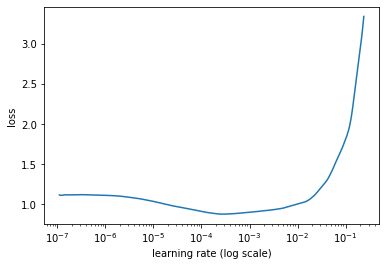

In [65]:
learner.lr_plot()

In [53]:
# 2e-5 is one of the LRs  recommended by Google and is consistent with the plot above.
#learner.fit_onecycle(2e-5, 1)
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
1688/1688 [==============================] - 389s 216ms/step - loss: 0.4181 - accuracy: 0.8265 - val_loss: 0.1466 - val_accuracy: 0.9533
Epoch 2/3
1688/1688 [==============================] - 359s 213ms/step - loss: 0.1373 - accuracy: 0.9536 - val_loss: 0.1119 - val_accuracy: 0.9647
Epoch 3/3
1688/1688 [==============================] - 360s 213ms/step - loss: 0.0390 - accuracy: 0.9874 - val_loss: 0.0821 - val_accuracy: 0.9780


In [59]:
# define a custom callback for ROC-AUC
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import roc_auc_score
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))
#RocAuc = RocAucEvaluation(validation_data=(x_test, y_test), interval=1)
RocAuc = RocAucEvaluation(validation_data=(val), interval=1)

# train using our custom ROC-AUC callback
#learner = ktrain.get_learner(model, train_data=train_data, val_data = val_data)
#learner.autofit(0.005, 2, callbacks=[RocAuc]) #0.00002 = 2e-5